## 🌲 Forest Cover Type Classification

This dataset contains information about different environmental and geographical features of forest areas, such as elevation, slope, soil type, and aspect.

The goal is to build a model to classify the type of forest cover (e.g., Spruce/Fir, Lodgepole Pine, Ponderosa Pine, etc.) based on these features.

The data is labeled, making it suitable for supervised learning, specifically a multiclass classification problem (predicting one of several forest cover types).

It can be used to train machine learning models to identify the relationship between environmental factors and forest cover types, and make accurate predictions for forest management, conservation, and land-use planning.

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries</h1>

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report , confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Load the Data</h1>

In [2]:
data = pd.read_csv(r"C:\Users\Teto\Desktop\Elevvo Pathways Interns\Forest Cover Type Classification\archive (11)\covertype.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Preprocessing</h1>

In [3]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [4]:
data.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [6]:
data.duplicated().sum()

0

In [7]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Unnamed: 0                            0
Unnamed: 1                            0
Unnamed: 2                            0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11  

In [8]:
data.columns


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [9]:
data.drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2"],axis=1,inplace=True)
data.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,5


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualize the Data</h1>

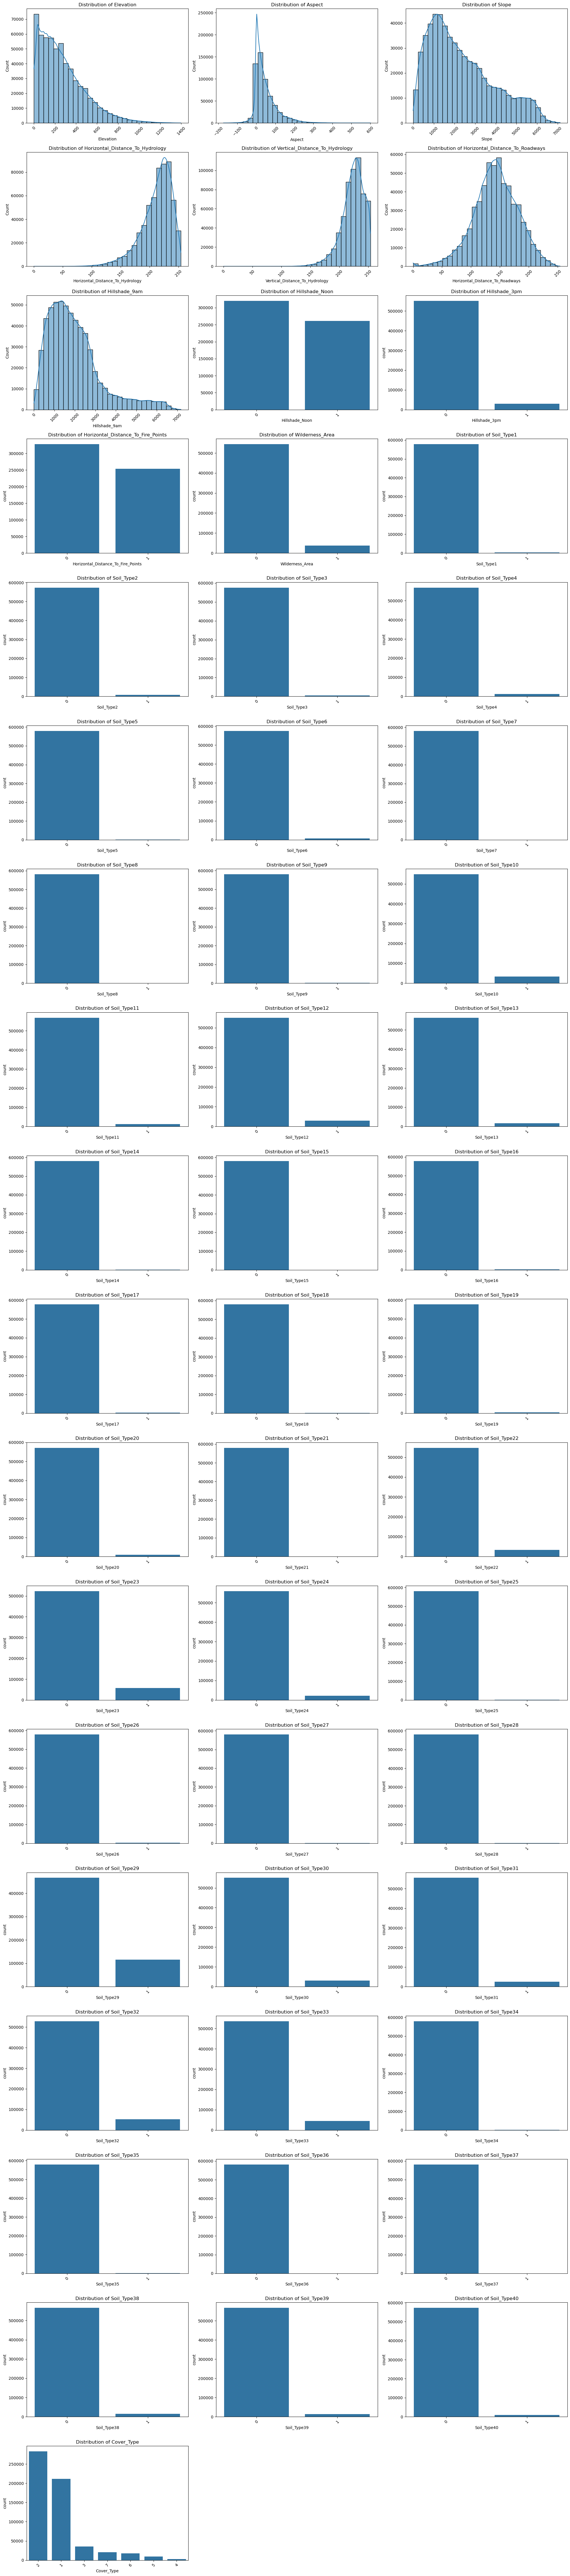

In [10]:
numeric_cols = data.select_dtypes(exclude='object').columns.tolist()

n_rows = (len(numeric_cols) + 2) // 3  

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    if data[col].nunique() < 20: 
        sns.countplot(data=data, x=col, ax=axes[i], order=data[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=data, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

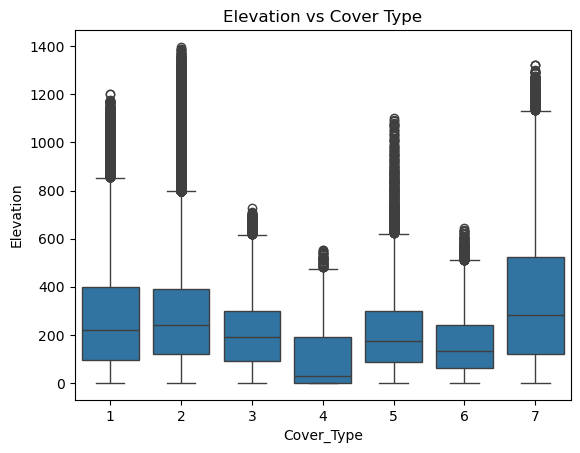

In [11]:
sns.boxplot(x="Cover_Type", y="Elevation", data=data)
plt.title("Elevation vs Cover Type")
plt.show()

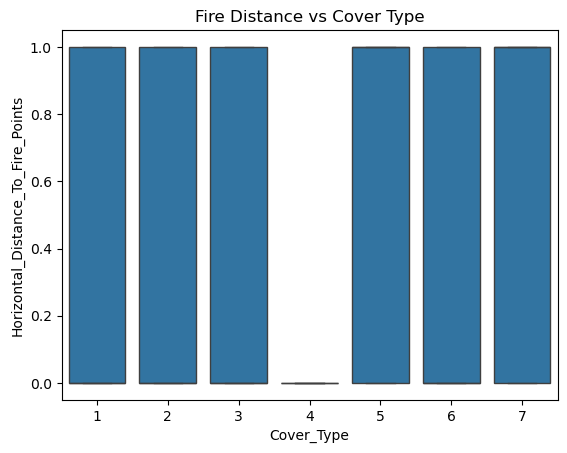

In [13]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=data)
plt.title("Fire Distance vs Cover Type")
plt.show()

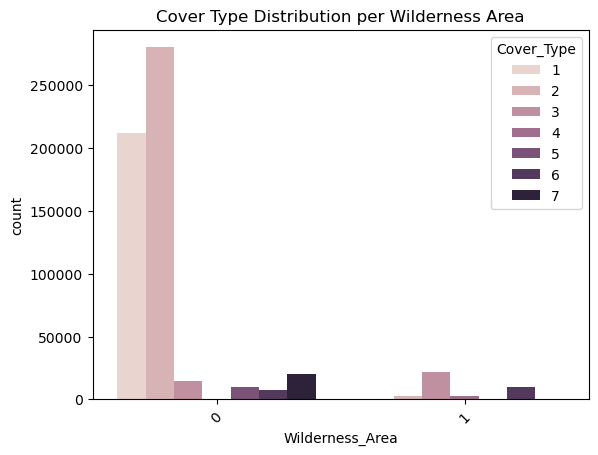

In [15]:
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.title("Cover Type Distribution per Wilderness Area")
plt.xticks(rotation=45)
plt.show()

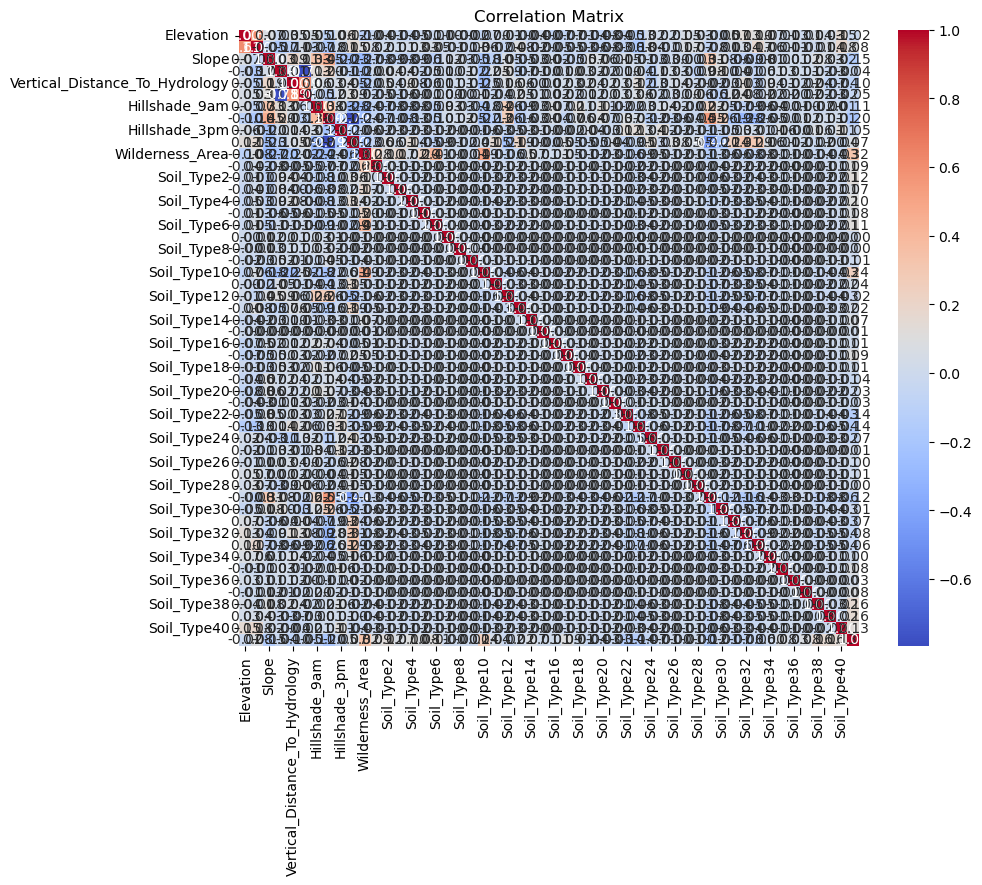

In [18]:
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
correlation = data.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False)
print(correlation)

Cover_Type                            1.000000
Wilderness_Area                       0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Aspect                                0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Horizontal_Distance_To_Fire_Points    0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13                           0.024404
Soil_Type16  


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature-target split</h1>

In [27]:
X = data.drop('Cover_Type', axis=1)
Y = data['Cover_Type']

In [28]:
print(Y.value_counts())
print(Y.value_counts(normalize=True) * 100)

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: Cover_Type, dtype: float64


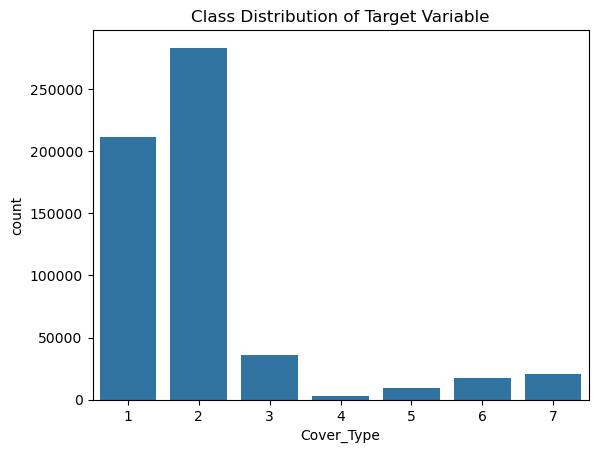

In [29]:
sns.countplot(x=Y)
plt.title("Class Distribution of Target Variable")
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Spliting Data</h1>

In [30]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size = 0.2, random_state = 42)


X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (464809, 51)
Shape of X_test: (116203, 51)
Shape of y_train: (464809,)
Shape of y_test: (116203,)


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Models and Evalution </h1>

In [31]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42 , class_weight = 'balanced')
rf.fit(X_train , Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [34]:
y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test , y_pred_rf))


              precision    recall  f1-score   support

           1       0.95      0.93      0.94     42557
           2       0.93      0.96      0.95     56500
           3       0.93      0.95      0.94      7121
           4       0.89      0.81      0.85       526
           5       0.93      0.74      0.83      1995
           6       0.91      0.86      0.88      3489
           7       0.97      0.94      0.96      4015

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.91    116203
weighted avg       0.94      0.94      0.94    116203



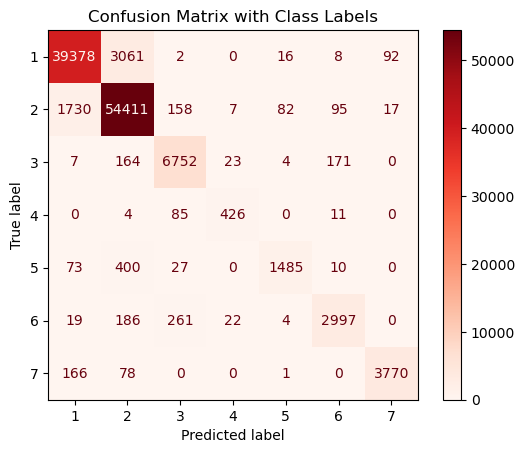

In [ ]:
cm = confusion_matrix(Y_test, y_pred_rf, labels=[1, 2, 3, 4, 5, 6, 7])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Hyperparameter-tuning</h1>

In [37]:
# Shift class labels to start from 0
y_train_adj = Y_train - 1
y_test_adj = Y_test - 1

In [38]:
param_grid_xgb = {
    'n_estimators' : [500],
    'max_depth' : [4, 6],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1]
}

grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid_xgb , cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train_adj)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 500}
Best score:  0.9239235916604334


In [41]:
# Compute class weights
classes = np.unique(y_train_adj)
weights = compute_class_weight('balanced' , classes = classes , y = y_train_adj)
weights

array([ 0.39225017,  0.29277334,  2.31904745, 29.89702193,  8.85586633,
        4.78464373,  4.02554021])

In [42]:
weight_dict = dict(zip(classes,weights))
weight_dict

{0: 0.39225017109978977,
 1: 0.2927733374821351,
 2: 2.3190474527393468,
 3: 29.89702193349199,
 4: 8.85586632625843,
 5: 4.784643732114549,
 6: 4.025540206989131}

In [43]:
sample_weights = np.array([weight_dict[label] for label in y_train_adj])


In [44]:
xgb = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=1 , random_state = 42)
xgb.fit(X_train, y_train_adj , sample_weight = sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_pred_xgb = xgb.predict(X_test) + 1
print(classification_report(Y_test , y_pred_xgb))


              precision    recall  f1-score   support

           1       0.92      0.93      0.92     42557
           2       0.94      0.92      0.93     56500
           3       0.94      0.96      0.95      7121
           4       0.87      0.86      0.86       526
           5       0.82      0.91      0.86      1995
           6       0.89      0.93      0.91      3489
           7       0.95      0.97      0.96      4015

    accuracy                           0.93    116203
   macro avg       0.90      0.93      0.91    116203
weighted avg       0.93      0.93      0.93    116203



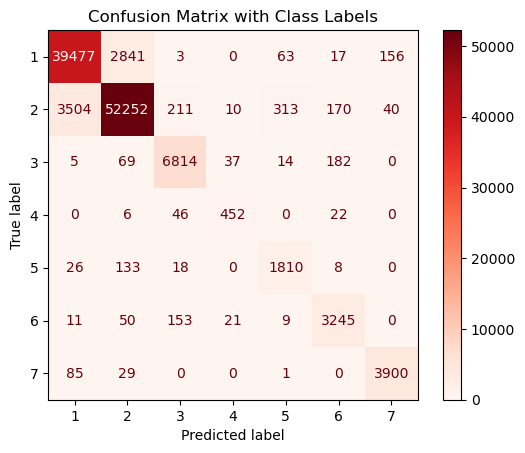

In [46]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_xgb, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Importance Visualization</h1>

In [47]:
# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Get feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

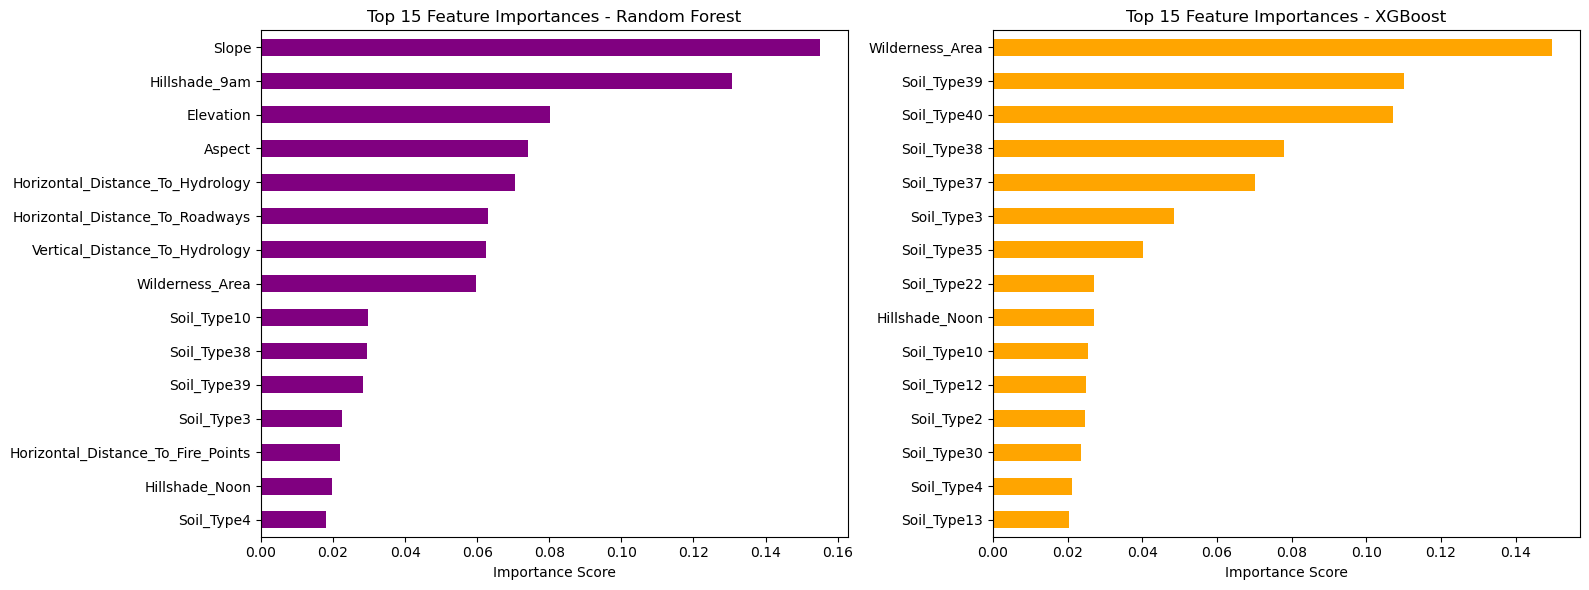

In [48]:
fig , axes = plt.subplots(1,2, figsize = (16,6))

rf_importances.head(15).sort_values().plot(kind = 'barh' , color = 'purple' , ax = axes[0])

axes[0].set_title("Top 15 Feature Importances - Random Forest")
axes[0].set_xlabel("Importance Score")

xgb_importances.head(15).sort_values().plot(kind = 'barh' , color = 'orange' , ax = axes[1])
axes[1].set_title("Top 15 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Random Forest metrics
accuracy_rf  = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf, average='weighted')
recall_rf    = recall_score(Y_test, y_pred_rf, average='weighted')
F1_score_rf  = f1_score(Y_test, y_pred_rf, average='weighted')

# XGBoost metrics
accuracy_xgb  = accuracy_score(Y_test, y_pred_xgb)
precision_xgb = precision_score(Y_test, y_pred_xgb, average='weighted')
recall_xgb    = recall_score(Y_test, y_pred_xgb, average='weighted')
F1_score_xgb  = f1_score(Y_test, y_pred_xgb, average='weighted')

In [54]:
metrics_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1_Score"],
    "Random Forest": [
        accuracy_rf,precision_rf,recall_rf,F1_score_rf
    ],
    "XGBoost": [
        accuracy_xgb,precision_xgb,recall_xgb,F1_score_xgb

    ]
})
metrics_comparison

,Metric,Random Forest,XGBoost
0,Accuracy,0.939898,0.928978
1,Precision,0.940084,0.929404
2,Recall,0.939898,0.928978
3,F1_Score,0.939579,0.929072


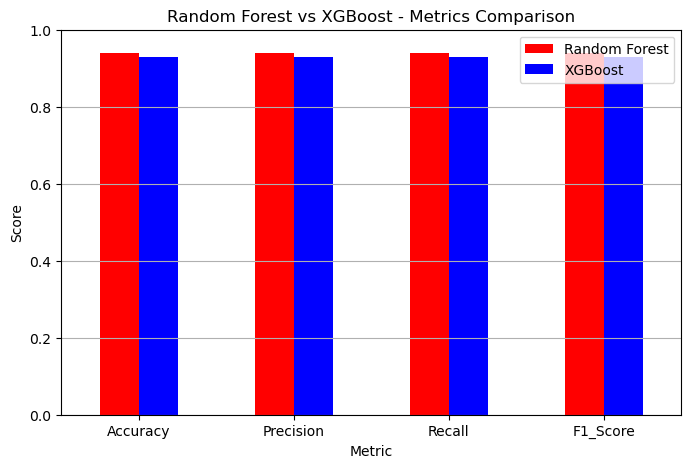

In [55]:
metrics_comparison.set_index("Metric").plot(
    kind='bar', figsize=(8, 5), color=["red", "blue"]
)
plt.title("Random Forest vs XGBoost - Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1) 
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()